## Binary Classification

Binary classification of electrons using XGBoost, there is 160 variables and 162500 events for training and 160651 events for testing

In [1]:
import h5py
import pandas
import numpy as np

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

# Variable list from https://www.nbi.dk/~petersen/Teaching/ML2023/InitialProject/VariableList.html
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]
subset_variables = ['p_e233', 'p_ehad1', 'p_E5x7_Lr2', 'p_f3core', 'p_deltaPhi0', 'p_f3', 'p_eAccCluster', 'p_dPOverP']
subset_variables = ['p_sigmad0', 'p_deltaEta1', 'p_d0', ]

X_train = train[all_variables][:130000]
#X_train = train[subset_variables][:130000]
y_train = train['Truth'][:130000]
X_validate = train[all_variables][130000:]
#X_validate = train[subset_variables][130000:]
y_validate = train['Truth'][130000:]

X_test = test[all_variables]

## Helper Functions

In [2]:
from sklearn.metrics import accuracy_score

def plot_boundary_results(X, y, clf):
    # sample the whole X space with a meshgrid of probabilities
    # predicted by out trained classifier
    xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 300),
                         np.linspace(X[:,1].min(), X[:,1].max(), 300))
    X_bkg = np.c_[xx.ravel(), yy.ravel()]
    y_bkg = clf.predict_proba(X_bkg)[:,0].reshape(xx.shape)
    y_pred = clf.predict(X)

    # plot the classification results
    fig, ax = plt.subplots(1, figsize=(8, 5))
    ax.contourf(xx, yy, y_bkg, cmap='brg', alpha=0.2) # coloured by class
    ax.contour(xx, yy, y_bkg, cmap='brg', alpha=0.2) # coloured by class
    ax.scatter(X[:,0][y_pred!=y], X[:,1][y_pred!=y], s=100, c='pink')
    ax.scatter(X[:,0][y==0], X[:,1][y==0], s=20, c='g')
    ax.scatter(X[:,0][y==1], X[:,1][y==1], s=20, c='b')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    plt.tight_layout()
    print(f"Train accuracy: {accuracy_score(y_pred, y)*100.0:.2f}%")

## XGBoost Method

Initialise tree, if model weights exists in file folder load it otherwise train and save to file

First train the tree based on all 160 variables to find 15 most impactful

In [3]:
import xgboost as xgb
import os


model_file_path = 'xgb_clf.model'

if os.path.exists(model_file_path):
    xgb_clf = xgb.XGBClassifier()
    xgb_clf.load_model(model_file_path)
    
else:
    # Fit the model again
    xgb_clf = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01,
                            max_depth=10, eval_metric='logloss', n_estimators=300,
                            seed=42, use_label_encoder=False)
    xgb_clf.fit(X_train.values, y_train.values)

    # Save the model to a file
    xgb_clf.save_model(model_file_path)

Train accuracy: 96.43%
Validation accuracy: 94.32%


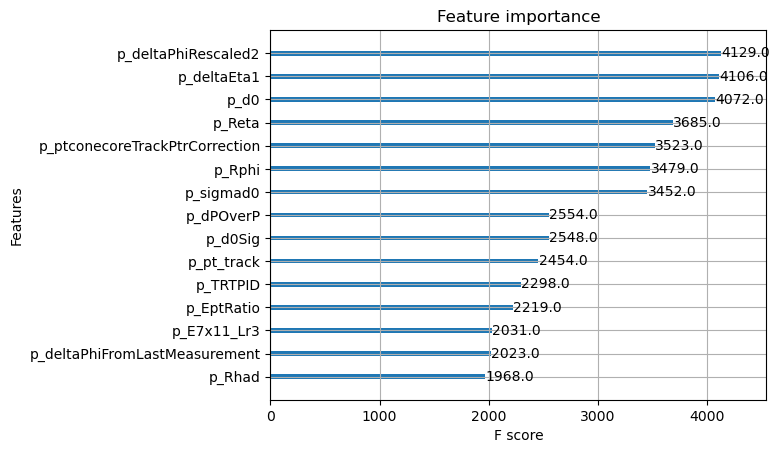

In [4]:
xgb_clf.get_booster().feature_names = all_variables
xgb.plot_importance(xgb_clf, max_num_features=15)
y_pred = xgb_clf.predict(X_train)
y_validate_pred = xgb_clf.predict(X_validate)
print(f"Train accuracy: {accuracy_score(y_pred, y_train)*100.0:.2f}%")
print(f"Validation accuracy: {accuracy_score(y_validate_pred, y_validate)*100.0:.2f}%")

# Permutation Importance

Shuffle values for 1 feature, compute change in loss function. The more impact from permutation, the more impactful feature is

In [5]:
from sklearn.inspection import permutation_importance
r = permutation_importance(xgb_clf, X_validate, y_validate,
                            n_repeats=4,
                            random_state=0)



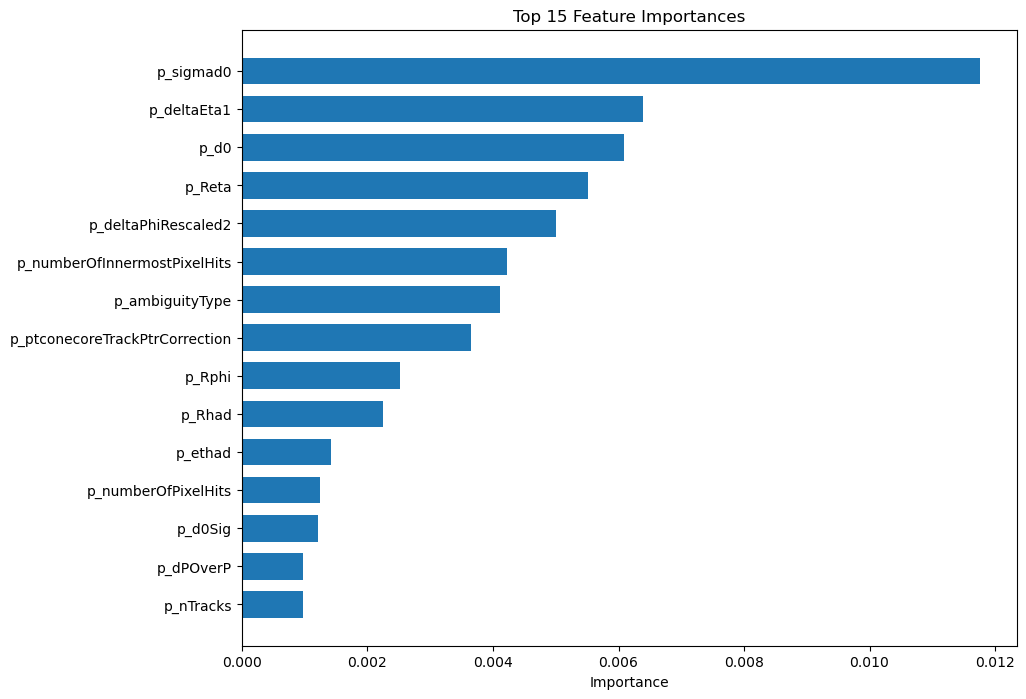

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# assuming you have a list of feature names in all_variables and a corresponding list of feature importances in r.importances_mean
sorted_idx = np.argsort(r.importances_mean) # get the indices that would sort the importances in ascending order
sorted_variables = [all_variables[i] for i in sorted_idx] # sort the variable names using the sorted indices

fig, ax = plt.subplots(figsize=(10, 8)) # create a figure and axis object
ax.barh(np.arange(15), r.importances_mean[sorted_idx][-15:], height=0.7, align="center") # create the horizontal bar plot using the top 15 sorted importances
ax.set_yticks(np.arange(15)) # set the y-ticks to be the range of top 15 feature indices
ax.set_yticklabels(sorted_variables[-15:]) # set the y-tick labels to be the top 15 sorted feature names
#ax.invert_yaxis() # invert the y-axis so that the feature names are in descending order from top to bottom
ax.set_xlabel('Importance') # set the x-label
ax.set_title('Top 15 Feature Importances') # set the plot title
plt.show() # display the plot


# Retrain XGB tree with only 15 most impactful features

In [7]:
top_sorted_variables = sorted_variables[-15:]
top_sorted_variables = top_sorted_variables[::-1]

X_train_top = X_train[top_sorted_variables]
X_validate_top = X_validate[top_sorted_variables]
X_test_top = X_test[top_sorted_variables]

In [8]:
xgb_clf_feature_ranked = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.01,
                            max_depth=10, eval_metric='logloss', n_estimators=300,
                            seed=42, use_label_encoder=False)
xgb_clf_feature_ranked.fit(X_train_top.values, y_train.values)


xgb_clf_feature_ranked.get_booster().feature_names = top_sorted_variables
y_pred = xgb_clf_feature_ranked.predict(X_train_top)
y_validate_pred = xgb_clf_feature_ranked.predict(X_validate_top)
print(f"Train accuracy: {accuracy_score(y_pred, y_train)*100.0:.2f}%")
print(f"Validation accuracy: {accuracy_score(y_validate_pred, y_validate)*100.0:.2f}%")

C:\Users\Juliu\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train accuracy: 95.74%
Validation accuracy: 94.05%


In [9]:
y_test_pred = xgb_clf_feature_ranked.predict_proba(X_test_top)

(array([ 7402.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25098.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

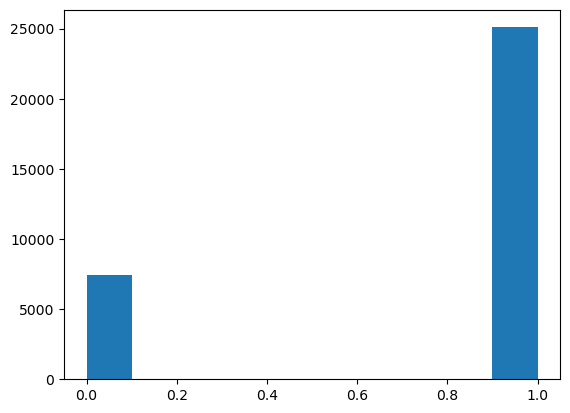

In [10]:
plt.hist(y_validate_pred)

In [11]:
# Write results to a file

# Probabilities of particle being an electron
with open('Classification_JuliusFoverskov_XGBoost.txt','w') as f:
    # y_test_pred col 1 = electron probability
    for index, prediction in zip(X_test_top.index, y_test_pred[:, 1]):
        f.write(f"{index}, {prediction}\n")

# List of most important features from permutation importance for electron classification
with open('Classification_JuliusFoverskov_XGBoost_VariableList.txt','w') as f:
    f.write("\n".join(map(str, top_sorted_variables)))

In [12]:
corr_matrix = X_train.corr()
corr_pairs = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print(corr_pairs.head(20))

actualInteractionsPerCrossing  actualInteractionsPerCrossing    1.000000
p_phiClusterLr2                p_phiCluster                     1.000000
p_etaCalo                      p_etaCluster                     1.000000
p_rawEtaCluster                p_etaClusterLr2                  0.999999
                               p_etaClusterLr1                  0.999999
p_etaClusterLr2                p_etaCalo                        0.999998
p_etaClusterLr1                p_etaCalo                        0.999998
p_etaClusterLr2                p_etaClusterLr1                  0.999997
p_deltaPhiRescaled2            p_deltaPhiRescaled3              0.999988
p_etaClusterLr2                p_eta                            0.999980
p_rawEtaCluster                p_eta                            0.999978
p_eta                          p_etaCalo                        0.999978
p_etaClusterLr1                p_eta                            0.999976
p_deltaEta1                    p_deltaPhi1         

## TODO

* Cross Validation
* Expand on feature selection?
* Select N most important features
* NN approach
* Silhouette Score